# Calculate Posteriors For Purchase Of Book Of Photos From 20th Century

Created: 2023-09-09 by Tom Lever

Updated: 2023-09-09 by Tom Lever

You have an online business selling books. A publisher has just given you a large book with photos from 20th-century photographers. You think this book will appeal to people who have bought art books, history books, and coffee-table books. In an initial offering of the new book you collect data on purchases of the new book and combine these data with data from past purchases.

Use Bayesian analysis to give the posterior probabilities for purchases of art books, history books, and coffee table books. Give the separate probabilities for purchases of the new book given each possible combination of prior purchases of art books, history books, and coffee table books. Do this first by using Beta priors with values of the hyperparameters that represent lack of prior information. Then compute these probabilities again with Beta priors that show strong weighting for low likelihood of a book purchase. Compare your results.

In [1]:
import pandas as pd
df = pd.read_csv('ArtHistBooks.csv')
df
number_of_purchase_histories = df.shape[0]
print(f'{number_of_purchase_histories} purchase histories included purchase of an art book, a history book, a coffee-table book, and/or our book of photos from 20th century.')

1000 purchase histories included purchase of an art book, a history book, a coffee-table book, and/or our book of photos from 20th century.


In [2]:
data_frame_of_purchase_histories_with_purchase_of_art_book = df[df['ArtBooks'] > 0]
number_of_purchase_histories_with_purchase_of_art_book = data_frame_of_purchase_histories_with_purchase_of_art_book.shape[0]
print(f'{number_of_purchase_histories_with_purchase_of_art_book} purchase histories included purchase of an art book.')

301 purchase histories included purchase of an art book.


In [3]:
data_frame_of_purchases_histories_with_purchase_of_book_of_photos_from_20th_century = df[df['Purchase'] > 0]
number_of_purchase_histories_with_purchase_of_book_of_photos_from_20th_century = data_frame_of_purchases_histories_with_purchase_of_book_of_photos_from_20th_century.shape[0]
print(f'{number_of_purchase_histories_with_purchase_of_book_of_photos_from_20th_century} purchases included purchase of our book of photos from 20th century.')

89 purchases included purchase of our book of photos from 20th century.


In [4]:
df_art_photos = data_frame_of_purchase_histories_with_purchase_of_art_book[data_frame_of_purchase_histories_with_purchase_of_art_book['Purchase'] > 0]
number_of_purchase_histories_with_purchase_of_art_book_and_book_of_photos_from_20th_century = df_art_photos.shape[0]
print(
    str(number_of_purchase_histories_with_purchase_of_art_book_and_book_of_photos_from_20th_century) +
    ' purchases included purchase of an art book and our book of photos from 20th century.'
)

58 purchases included purchase of an art book and our book of photos from 20th century.


In [5]:
P_photos = number_of_purchase_histories_with_purchase_of_book_of_photos_from_20th_century / number_of_purchase_histories
P_photos_given_art = number_of_purchase_histories_with_purchase_of_art_book_and_book_of_photos_from_20th_century / number_of_purchase_histories_with_purchase_of_art_book
print(f'The probability that a purchase history will include purchase of our book of photos from 20th century P(book of photos from 20th century) = {P_photos}')
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of an art book '
    + f'P(book of photos from 20th century | art book) = {P_photos_given_art}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century P(book of photos from 20th century) = 0.089
The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of an art book P(book of photos from 20th century | art book) = 0.19269102990033224


Is a customer more likely to buy our book of photos from 20th century given that we know that the customer bought an art book? Yes. The probability that a customer will purchase our book of photos from the 20th century given that the customer purchased an art book, $0.193$, is about double the probability that a customer will purchase our book of photos from 20th century, $0.089$.

In [6]:
data_frame_of_purchase_histories_with_purchase_of_history_book = df[df['HistoryBooks'] > 0]
number_of_purchase_histories_with_purchase_of_history_book = data_frame_of_purchase_histories_with_purchase_of_history_book.shape[0]
print(f'{number_of_purchase_histories_with_purchase_of_history_book} purchases included purchase of a history book.')
df_history_and_art = data_frame_of_purchase_histories_with_purchase_of_history_book[data_frame_of_purchase_histories_with_purchase_of_history_book['Purchase'] > 0]
n_history_and_photos = df_history_and_art.shape[0]
P_photos_given_history = n_history_and_photos / number_of_purchase_histories_with_purchase_of_history_book
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of a history book '
    + f'P(book of photos from 20th century | history book) = {P_photos_given_history}'
)

543 purchases included purchase of a history book.
The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of a history book P(book of photos from 20th century | history book) = 0.12154696132596685


In [7]:
df_coffee_table = df[df['TableBooks'] > 0]
number_of_purchase_histories_with_purchase_of_coffee_table_book = df_coffee_table.shape[0]
df_coffee_table_and_photos = df_coffee_table[df_coffee_table['Purchase'] > 0]
n_coffee_table_and_photos = df_coffee_table_and_photos.shape[0]
P_photos_given_coffee_table = n_coffee_table_and_photos / number_of_purchase_histories_with_purchase_of_coffee_table_book
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century '
    + 'given that the purchase history includes purchase of a coffee table book '
    + f'P(book of photos from 20th century | coffee table book) = {P_photos_given_coffee_table}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of a coffee table book P(book of photos from 20th century | coffee table book) = 0.12368421052631579


In [8]:
df_art_and_history = df[(df['ArtBooks'] > 0) & (df['HistoryBooks'] > 0)]
number_of_purchase_histories_with_purchase_of_art_and_history_books = df_art_and_history.shape[0]
df_art_and_history_and_book_of_photos_from_20th_century = df_art_and_history[df_art_and_history['Purchase'] > 0]
n_art_history_and_photos = df_art_and_history_and_book_of_photos_from_20th_century.shape[0]
P_photos_given_art_and_history = n_art_history_and_photos / number_of_purchase_histories_with_purchase_of_art_and_history_books
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century '
    f'given that the purchase history includes purchase of art and history books P(book of photos from 20th century | art and history books) = {P_photos_given_art_and_history}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of art and history books P(book of photos from 20th century | art and history books) = 0.24561403508771928


In [9]:
df_art_and_coffee_table = df[(df['ArtBooks'] > 0) & (df['TableBooks'] > 0)]
number_of_purchase_histories_with_purchase_of_art_and_coffee_table_books = df_art_and_coffee_table.shape[0]
df_art_and_coffee_table_and_book_of_photos_from_20th_century = df_art_and_coffee_table[df_art_and_coffee_table['Purchase'] > 0]
n_art_coffee_table_and_photos = df_art_and_coffee_table_and_book_of_photos_from_20th_century.shape[0]
P_photos_given_art_and_coffee_table = n_art_coffee_table_and_photos / number_of_purchase_histories_with_purchase_of_art_and_coffee_table_books
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century '
    + 'given that the purchase history includes purchase of art and coffee table books '
    + f'P(book of photos from 20th century | art and coffee table books) = {P_photos_given_art_and_coffee_table}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of art and coffee table books P(book of photos from 20th century | art and coffee table books) = 0.24


In [10]:
df_history_and_coffee_table = df[(df['HistoryBooks'] > 0) & (df['TableBooks'] > 0)]
number_of_purchase_histories_with_purchase_of_history_and_coffee_table_books = df_history_and_coffee_table.shape[0]
df_history_coffee_table_and_photos = df_history_and_coffee_table[df_history_and_coffee_table['Purchase'] > 0]
n_history_coffee_table_and_photos = df_history_coffee_table_and_photos.shape[0]
P_photos_given_history_and_coffee_table = n_history_coffee_table_and_photos / number_of_purchase_histories_with_purchase_of_history_and_coffee_table_books
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century '
    + 'given that the purchase history includes purchase of history and coffee table books '
    f'P(book of photos from 20th century | history and coffee table books) = {P_photos_given_history_and_coffee_table}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of history and coffee table books P(book of photos from 20th century | history and coffee table books) = 0.20833333333333334


In [11]:
df_art_history_and_coffee_table = df[(df['ArtBooks'] > 0) & (df['HistoryBooks'] > 0) & (df['TableBooks'] > 0)]
number_of_purchase_histories_with_purchase_of_art_history_and_coffee_table_books = df_art_history_and_coffee_table.shape[0]
df_art_history_coffee_table_and_photos = df_art_history_and_coffee_table[df_art_history_and_coffee_table['Purchase'] > 0]
n_art_history_coffee_table_and_photos = df_art_history_coffee_table_and_photos.shape[0]
P_photos_given_art_history_and_coffee_table = n_art_history_coffee_table_and_photos / number_of_purchase_histories_with_purchase_of_art_history_and_coffee_table_books
print(
    'The probability that a purchase history will include purchase of our book of photos from 20th century '
    + 'given that the purchase history includes purchase of art, history, and coffee table books '
    + f'P(book of photos from 20th century | art, history, and coffee table books) = {P_photos_given_art_history_and_coffee_table}'
)

The probability that a purchase history will include purchase of our book of photos from 20th century given that the purchase history includes purchase of art, history, and coffee table books P(book of photos from 20th century | art, history, and coffee table books) = 0.36619718309859156


[Text(0.5, 0, 'Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee Table Books $n$'),
 Text(0, 0.5, 'Beta(a = 1, b = 1) Prior Probability Density Distribution $f(n)$'),
 Text(0.5, 1.0, 'Beta(a = 1, b = 1) Prior Probability Density Distribution $f(n)$\nVs. Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Books $n$')]

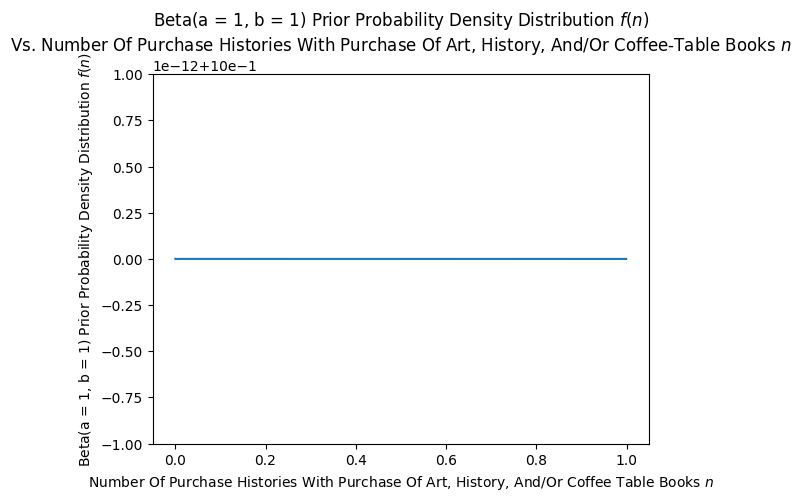

In [12]:
import numpy as np
difference_between_two_values_of_x = 0.001
array_of_probabilities = np.arange(0, 1, difference_between_two_values_of_x)
shape_parameter_a = 1 # number of successes
shape_parameter_b = 1 # number of failures
# a + b = number of trials
from scipy.stats import beta
Beta_1_1_prior_probability_distribution = beta.pdf(
    x = array_of_probabilities,
    a = shape_parameter_a,
    b = shape_parameter_b
)
import pandas as pd
data_frame = pd.DataFrame({"x": array_of_probabilities, "y": Beta_1_1_prior_probability_distribution})
import seaborn as sns
ax = sns.lineplot(data = data_frame, x = "x", y = "y")
ax.set(
    xlabel = 'Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee Table Books $n$',
    ylabel = 'Beta(a = 1, b = 1) Prior Probability Density Distribution $f(n)$',
    title = f'Beta(a = 1, b = 1) Prior Probability Density Distribution $f(n)$\nVs. Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Books $n$')

Probability under likelihood for art books: 0.0009990009990010007
Probability under posterior for art books for Beta(1, 1) prior: 1.0
Probability under likelihood for history books: 0.0009990009990009942
Probability under posterior for history books for Beta(1, 1) prior: 1.0
Probability under likelihood for coffee-table books: 0.0009990009990009999
Probability under posterior for coffee-table books for Beta(1, 1) prior: 0.9999999999999999


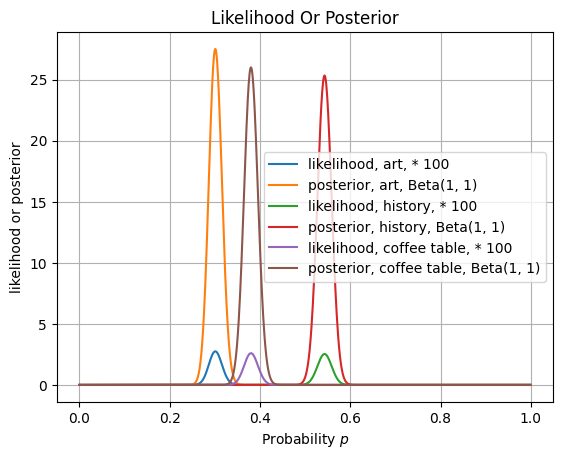

In [13]:
from scipy.stats import binom

# -----

likelihood_art = binom.pmf(
    n = number_of_purchase_histories,
    k = number_of_purchase_histories_with_purchase_of_art_book,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_art * 100,
    label = 'likelihood, art, * 100'
)
probability_under_likelihood_art = np.sum(likelihood_art * difference_between_two_values_of_x)
print(f'Probability under likelihood for art books: {probability_under_likelihood_art}')

total_and_marginal_probability_art_beta_1_1 = np.sum(likelihood_art * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_beta_1_1 = likelihood_art * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_art_beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_beta_1_1,
    label = 'posterior, art, Beta(1, 1)'
)
probability_under_posterior_art = np.sum(posterior_art_beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for art books for Beta(1, 1) prior: {probability_under_posterior_art}')

# -----

likelihood_history = binom.pmf(
    n = number_of_purchase_histories,
    k = number_of_purchase_histories_with_purchase_of_history_book,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_history * 100,
    label = 'likelihood, history, * 100'
)
probability_under_likelihood_history = np.sum(likelihood_history * difference_between_two_values_of_x)
print(f'Probability under likelihood for history books: {probability_under_likelihood_history}')

total_and_marginal_probability_history_beta_1_1 = np.sum(likelihood_history * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_history = likelihood_history * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_history_beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_history,
    label = 'posterior, history, Beta(1, 1)'
)
probability_under_posterior_history = np.sum(posterior_history * difference_between_two_values_of_x)
print(f'Probability under posterior for history books for Beta(1, 1) prior: {probability_under_posterior_history}')

# -----

likelihood_coffee_table = binom.pmf(
    n = number_of_purchase_histories,
    k = number_of_purchase_histories_with_purchase_of_coffee_table_book,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_coffee_table * 100,
    label = 'likelihood, coffee table, * 100'
)
probability_under_likelihood_coffee_table = np.sum(likelihood_coffee_table * difference_between_two_values_of_x)
print(f'Probability under likelihood for coffee-table books: {probability_under_likelihood_coffee_table}')

total_and_marginal_probability_coffee_table_beta_1_1 = np.sum(likelihood_coffee_table * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_coffee_table = likelihood_coffee_table * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_coffee_table_beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_coffee_table,
    label = 'posterior, coffee table, Beta(1, 1)'
)
probability_under_posterior_coffee_table = np.sum(posterior_coffee_table * difference_between_two_values_of_x)
print(f'Probability under posterior for coffee-table books for Beta(1, 1) prior: {probability_under_posterior_coffee_table}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'likelihood or posterior',
    title = 'Likelihood Or Posterior'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

[Text(0.5, 0, 'Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Books $n$'),
 Text(0, 0.5, 'Beta(a = 2, b = 8) Prior Probability Density Distribution $f(n)$'),
 Text(0.5, 1.0, 'Beta(a = 2, b = 8) Prior Probability Density Distribution $f(n)$\nVs. Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Book $n$')]

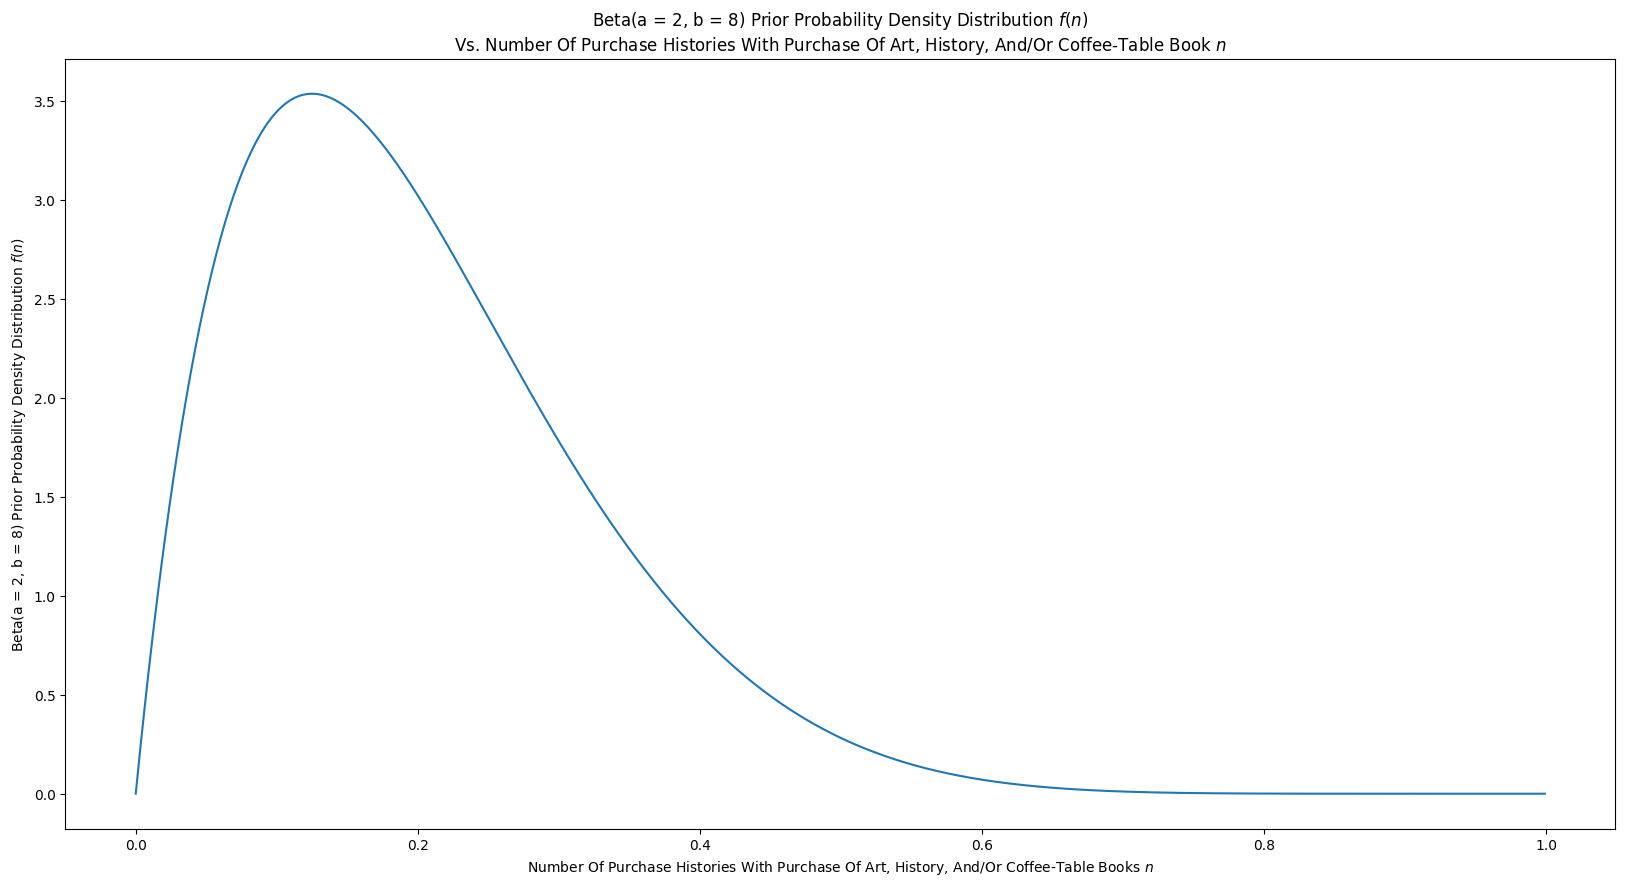

In [14]:
import numpy as np
difference_between_two_values_of_x = 0.001
array_of_probabilities = np.arange(0, 1, difference_between_two_values_of_x)
shape_parameter_a = 2 # number of successes
shape_parameter_b = 8 # number of failures
# a + b = number of trials
from scipy.stats import beta
Beta_2_8_prior_probability_distribution = beta.pdf(
    x = array_of_probabilities,
    a = shape_parameter_a,
    b = shape_parameter_b
)
import pandas as pd
data_frame = pd.DataFrame({"x": array_of_probabilities, "y": Beta_2_8_prior_probability_distribution})
import seaborn as sns
ax = sns.lineplot(data = data_frame, x = "x", y = "y")
ax.set(
    xlabel = 'Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Books $n$',
    ylabel = 'Beta(a = 2, b = 8) Prior Probability Density Distribution $f(n)$',
    title = f'Beta(a = 2, b = 8) Prior Probability Density Distribution $f(n)$\nVs. Number Of Purchase Histories With Purchase Of Art, History, And/Or Coffee-Table Book $n$')

Probability under likelihood for art books for Beta(2, 8) prior: 0.003311258278145696
Probability under posterior for art books for Beta(1, 1) prior: 0.9999999999999999
Probability under posterior for art books for Beta(2, 8) prior: 1.0000000000000004


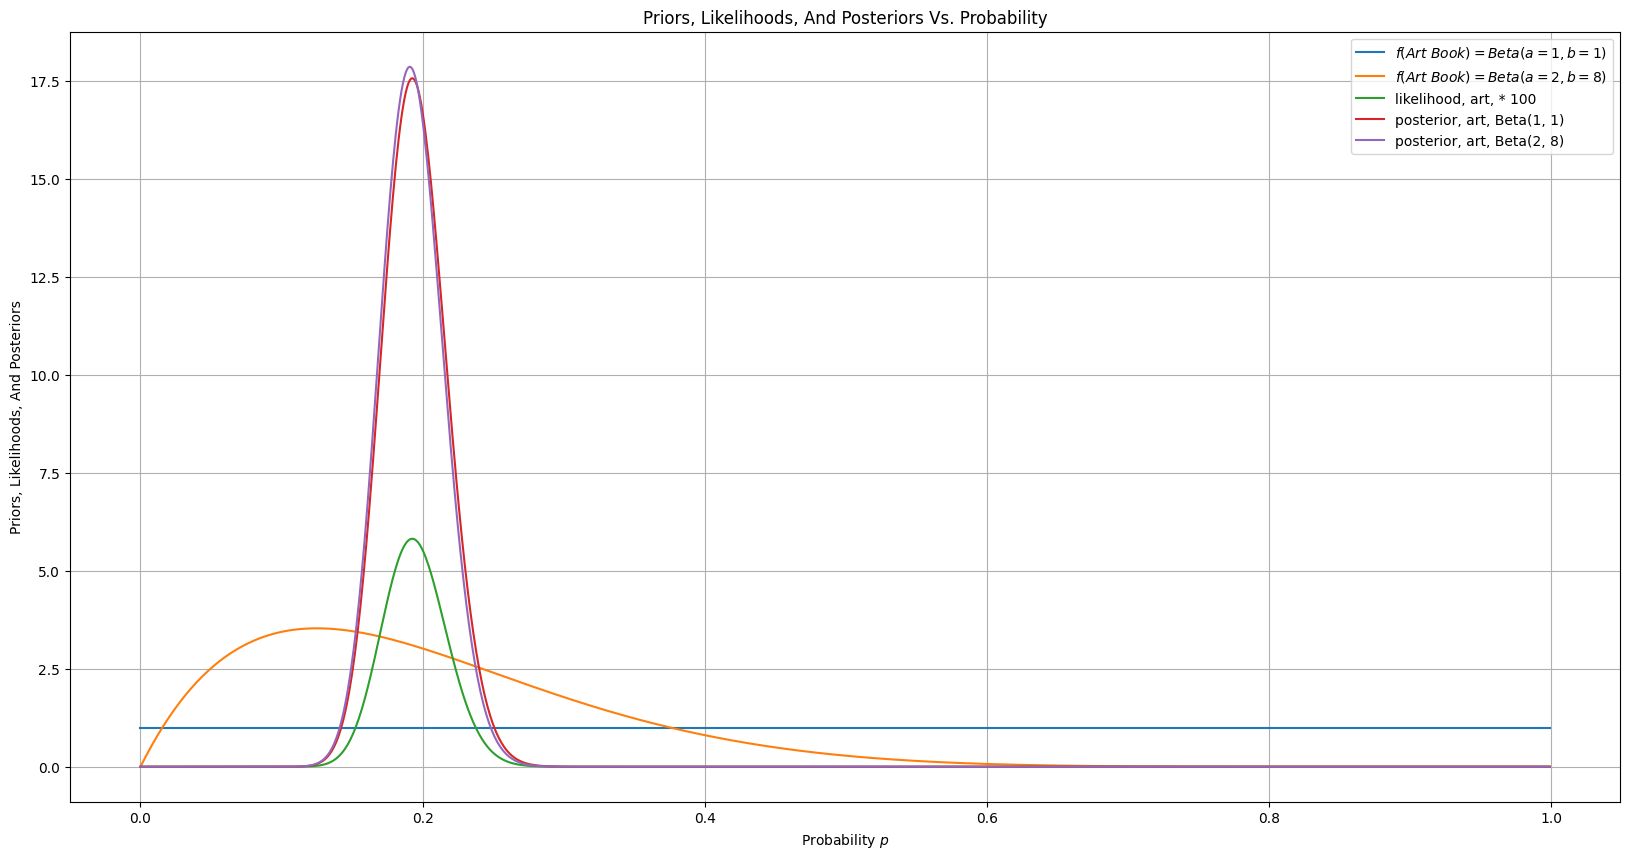

In [18]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(Art \ Book) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(Art \ Book) = Beta(a = 2, b = 8)$')

likelihood_art = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_art_book,
    k = number_of_purchase_histories_with_purchase_of_art_book_and_book_of_photos_from_20th_century,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_art * 100,
    label = 'likelihood, art, * 100'
)
probability_under_likelihood_art = np.sum(likelihood_art * difference_between_two_values_of_x)
print(f'Probability under likelihood for art books for Beta(2, 8) prior: {probability_under_likelihood_art}')

total_and_marginal_probability_art_Beta_1_1 = np.sum(likelihood_art * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_Beta_1_1 = likelihood_art * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_art_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_Beta_1_1,
    label = 'posterior, art, Beta(1, 1)'
)
probability_under_posterior_art_Beta_1_1 = np.sum(posterior_art_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for art books for Beta(1, 1) prior: {probability_under_posterior_art_Beta_1_1}')

total_and_marginal_probability_art_Beta_2_8 = np.sum(likelihood_art * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_Beta_2_8 = likelihood_art * Beta_2_8_prior_probability_distribution / total_and_marginal_probability_art_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_Beta_2_8,
    label = 'posterior, art, Beta(2, 8)'
)
probability_under_posterior_art_beta_2_8 = np.sum(posterior_art_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for art books for Beta(2, 8) prior: {probability_under_posterior_art_beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

Probability under likelihood for history books: 0.0018382352941176477
Probability under posterior for history books for Beta(1, 1) prior: 1.0000000000000002
Probability under posterior for history books for Beta(2, 8) prior: 0.9999999999999999


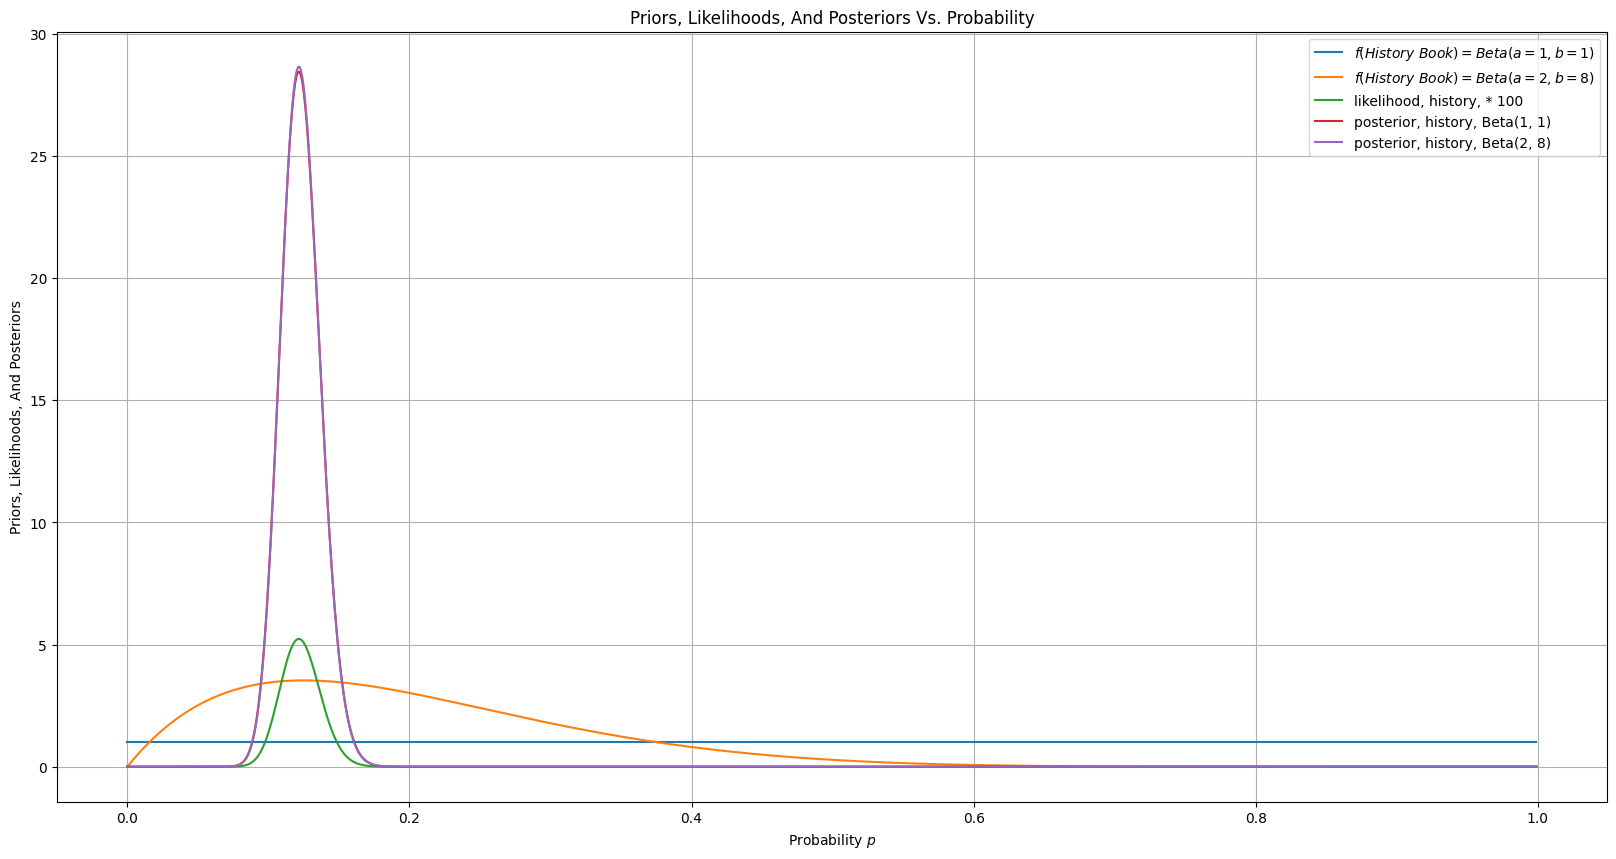

In [19]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(History \ Book) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(History \ Book) = Beta(a = 2, b = 8)$')

likelihood_history = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_history_book,
    k = n_history_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_history * 100,
    label = 'likelihood, history, * 100'
)
probability_under_likelihood_history = np.sum(likelihood_history * difference_between_two_values_of_x)
print(f'Probability under likelihood for history books: {probability_under_likelihood_history}')

total_and_marginal_probability_history_Beta_1_1 = np.sum(likelihood_history * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_history_Beta_1_1 = likelihood_history * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_history_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_history_Beta_1_1,
    label = 'posterior, history, Beta(1, 1)'
)
probability_under_posterior_history_Beta_1_1 = np.sum(posterior_history_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for history books for Beta(1, 1) prior: {probability_under_posterior_history_Beta_1_1}')

total_and_marginal_probability_history_Beta_2_8 = np.sum(likelihood_history * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_history_Beta_2_8 = likelihood_history * Beta_2_8_prior_probability_distribution / total_and_marginal_probability_history_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_history_Beta_2_8,
    label = 'posterior, history, Beta(2, 8)'
)
probability_under_posterior_history_Beta_2_8 = np.sum(posterior_history_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for history books for Beta(2, 8) prior: {probability_under_posterior_history_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

Probability under likelihood for coffee table books: 0.002624671916010499
Probability under posterior for coffee-table books for Beta(1, 1) prior: 0.9999999999999999
Probability under posterior for coffee-table books for Beta(2, 8) prior: 0.9999999999999998


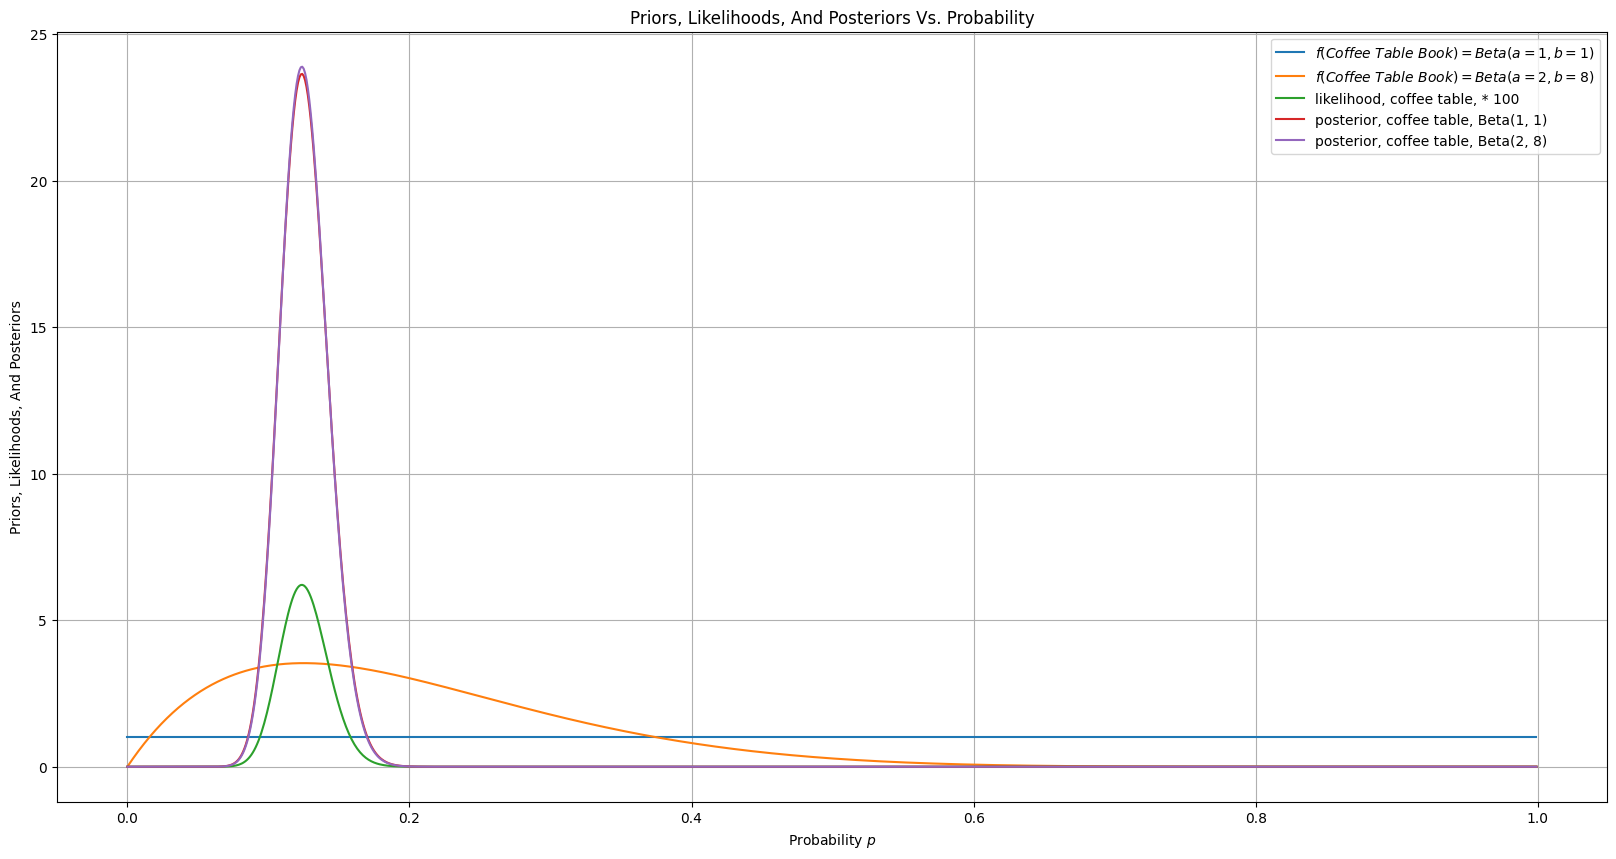

In [20]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(Coffee \ Table \ Book) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(Coffee \ Table \ Book) = Beta(a = 2, b = 8)$')

likelihood_coffee_table = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_coffee_table_book,
    k = n_coffee_table_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_coffee_table * 100,
    label = 'likelihood, coffee table, * 100'
)
probability_under_likelihood_coffee_table = np.sum(likelihood_coffee_table * difference_between_two_values_of_x)
print(f'Probability under likelihood for coffee table books: {probability_under_likelihood_coffee_table}')

total_and_marginal_probability_coffee_table_Beta_1_1 = np.sum(likelihood_coffee_table * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_coffee_table_Beta_1_1 = likelihood_coffee_table * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_coffee_table_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_coffee_table_Beta_1_1,
    label = 'posterior, coffee table, Beta(1, 1)'
)
probability_under_posterior_coffee_table_Beta_1_1 = np.sum(posterior_coffee_table_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for coffee-table books for Beta(1, 1) prior: {probability_under_posterior_coffee_table_Beta_1_1}')

total_and_marginal_probability_coffee_table_Beta_2_8 = np.sum(likelihood_coffee_table * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_coffee_table_Beta_2_8 = likelihood_coffee_table * Beta_2_8_prior_probability_distribution / total_and_marginal_probability_coffee_table_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_coffee_table_Beta_2_8,
    label = 'posterior, coffee table, Beta(2, 8)'
)
probability_under_posterior_coffee_table_Beta_2_8 = np.sum(posterior_coffee_table_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for coffee-table books for Beta(2, 8) prior: {probability_under_posterior_coffee_table_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

Probability under likelihood for art and history books: 0.005813953488372095
Probability under posterior for art and history books for Beta(1, 1) prior: 0.9999999999999998
Probability under posterior for art and history books for Beta(2, 8) prior: 1.0000000000000002


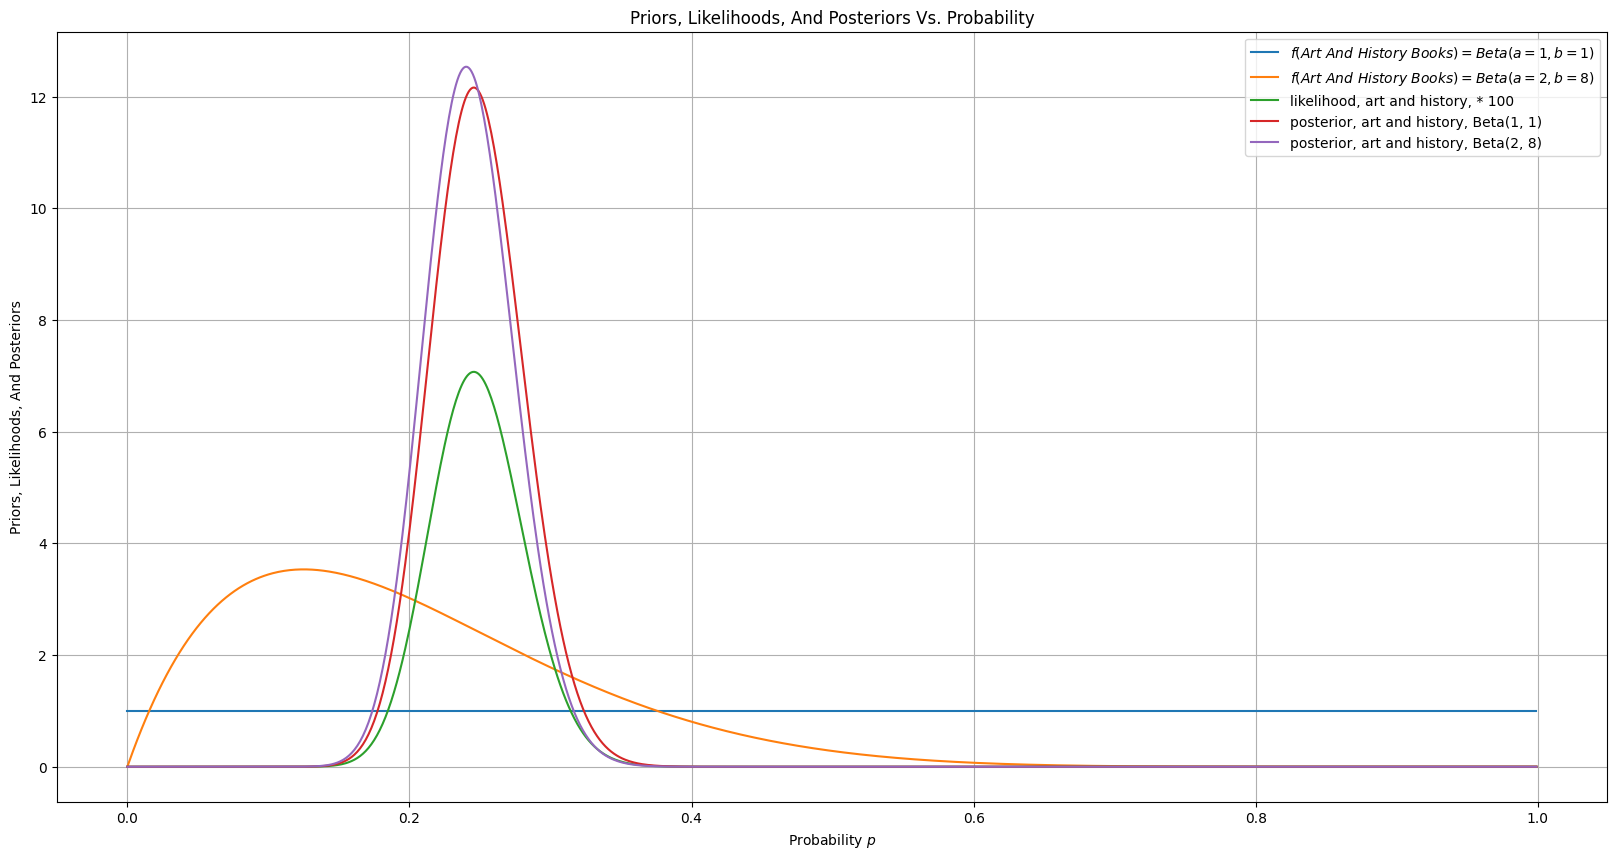

In [21]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(Art \ And \ History \ Books) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(Art \ And \ History \ Books) = Beta(a = 2, b = 8)$')

likelihood_art_and_history = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_art_and_history_books,
    k = n_art_history_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_art_and_history * 100,
    label = 'likelihood, art and history, * 100'
)
probability_under_likelihood_art_and_history = np.sum(likelihood_art_and_history * difference_between_two_values_of_x)
print(f'Probability under likelihood for art and history books: {probability_under_likelihood_art_and_history}')

total_and_marginal_probability_art_and_history_Beta_1_1 = np.sum(likelihood_art_and_history * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_and_history_Beta_1_1 = likelihood_art_and_history * Beta_1_1_prior_probability_distribution / total_and_marginal_probability_art_and_history_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_and_history_Beta_1_1,
    label = 'posterior, art and history, Beta(1, 1)'
)
probability_under_posterior_art_and_history_Beta_1_1 = np.sum(posterior_art_and_history_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for art and history books for Beta(1, 1) prior: {probability_under_posterior_art_and_history_Beta_1_1}')

total_and_marginal_probability_art_and_history_Beta_2_8 = np.sum(likelihood_art_and_history * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_and_history_Beta_2_8 = likelihood_art_and_history * Beta_2_8_prior_probability_distribution / total_and_marginal_probability_art_and_history_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_and_history_Beta_2_8,
    label = 'posterior, art and history, Beta(2, 8)'
)
probability_under_posterior_art_and_history_Beta_2_8 = np.sum(posterior_art_and_history_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for art and history books for Beta(2, 8) prior: {probability_under_posterior_art_and_history_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

Probability under likelihood for art and coffee-table books: 0.007936507936507936
Probability under posterior for art and coffee table books and Beta(2, 8) prior: 1.0000000000000004
Probability under posterior for art and coffee-table books and Beta(2, 8) prior: 1.9624608830504157e-05


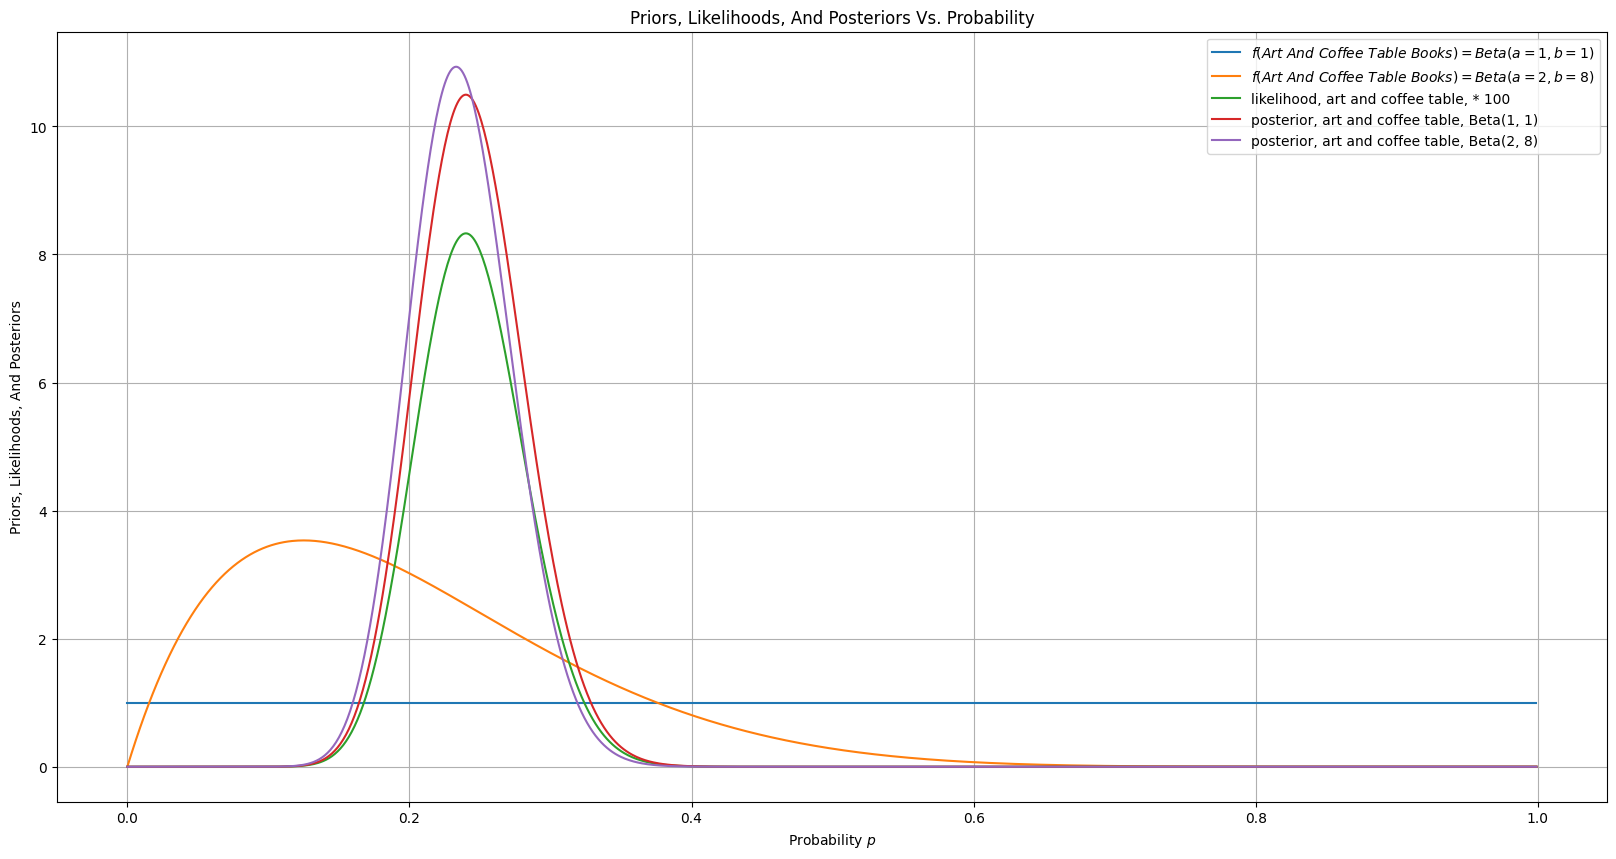

In [22]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(Art \ And \ Coffee \ Table \ Books) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(Art \ And \ Coffee \ Table \ Books) = Beta(a = 2, b = 8)$')

likelihood_art_and_coffee_table = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_art_and_coffee_table_books,
    k = n_art_coffee_table_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_art_and_coffee_table * 100,
    label = 'likelihood, art and coffee table, * 100'
)
probability_under_likelihood_art_and_coffee_table = np.sum(likelihood_art_and_coffee_table * difference_between_two_values_of_x)
print(f'Probability under likelihood for art and coffee-table books: {probability_under_likelihood_art_and_coffee_table}')

P_art_and_coffee_table_Beta_1_1 = np.sum(likelihood_art_and_coffee_table * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_and_coffee_table_Beta_1_1 = likelihood_art_and_coffee_table * Beta_1_1_prior_probability_distribution / P_art_and_coffee_table_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_and_coffee_table_Beta_1_1,
    label = 'posterior, art and coffee table, Beta(1, 1)'
)
probability_under_posterior_art_and_coffee_table_Beta_1_1 = np.sum(posterior_art_and_coffee_table_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for art and coffee table books and Beta(2, 8) prior: {probability_under_posterior_art_and_coffee_table_Beta_1_1}')

P_art_and_coffee_table_Beta_2_8 = np.sum(likelihood_art_and_coffee_table * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_and_coffee_table_Beta_2_8 = likelihood_art_and_coffee_table * Beta_2_8_prior_probability_distribution / P_art_and_coffee_table_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_and_coffee_table_Beta_2_8,
    label = 'posterior, art and coffee table, Beta(2, 8)'
)
probability_under_posterior_art_and_coffee_table_Beta_2_8 = np.sum(P_art_and_coffee_table_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for art and coffee-table books and Beta(2, 8) prior: {probability_under_posterior_art_and_coffee_table_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

Probability under likelihood for history and coffee table books: 0.00518134715025907
Probability under probability density distribution for likelihoods: 0.9999999999999999
Probability under posterior for history and coffee table books for Beta(2, 8) prior: 1.0


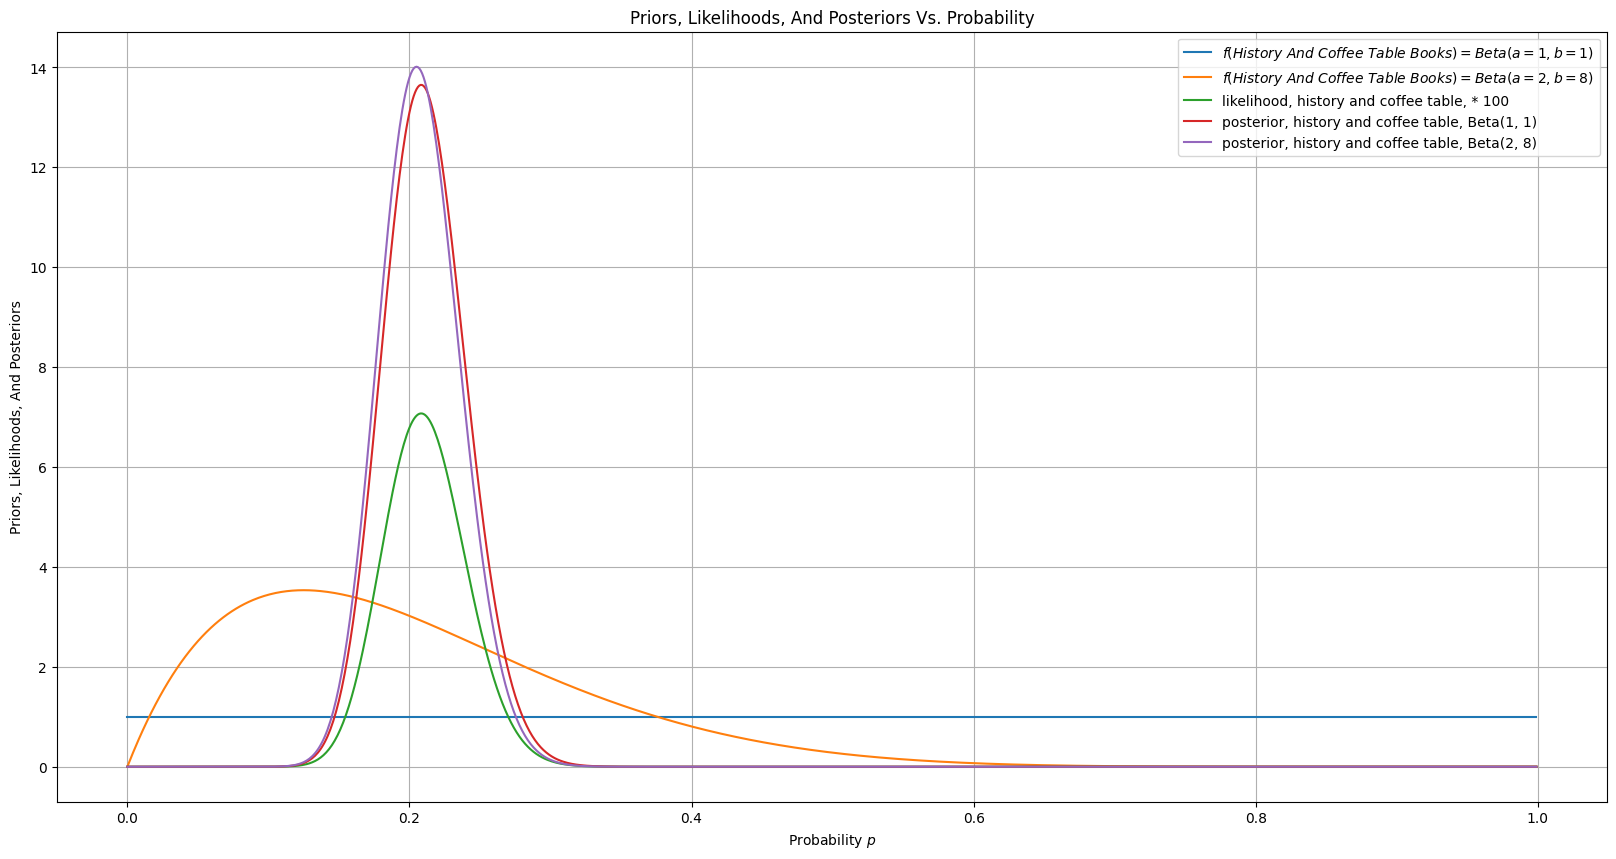

In [23]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(History \ And \ Coffee \ Table \ Books) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(History \ And \ Coffee \ Table \ Books) = Beta(a = 2, b = 8)$')

likelihood_history_and_coffee_table = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_history_and_coffee_table_books,
    k = n_history_coffee_table_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_history_and_coffee_table * 100,
    label = 'likelihood, history and coffee table, * 100'
)
probability_under_likelihood_history_and_coffee_table = np.sum(likelihood_history_and_coffee_table * difference_between_two_values_of_x)
print(f'Probability under likelihood for history and coffee table books: {probability_under_likelihood_history_and_coffee_table}')

P_history_and_coffee_table_Beta_1_1 = np.sum(likelihood_history_and_coffee_table * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
posterior_history_and_coffee_table_Beta_1_1 = likelihood_history_and_coffee_table * Beta_1_1_prior_probability_distribution / P_history_and_coffee_table_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_history_and_coffee_table_Beta_1_1,
    label = 'posterior, history and coffee table, Beta(1, 1)'
)
probability_under_posterior_history_and_coffee_table_Beta_1_1 = np.sum(posterior_history_and_coffee_table_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under probability density distribution for likelihoods: {probability_under_posterior_history_and_coffee_table_Beta_1_1}')

P_history_and_coffee_table_Beta_2_8 = np.sum(likelihood_history_and_coffee_table * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_history_and_coffee_table_Beta_2_8 = likelihood_history_and_coffee_table * Beta_2_8_prior_probability_distribution / P_history_and_coffee_table_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_history_and_coffee_table_Beta_2_8,
    label = 'posterior, history and coffee table, Beta(2, 8)'
)
probability_under_posterior_history_and_coffee_table_Beta_2_8 = np.sum(posterior_history_and_coffee_table_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for history and coffee table books for Beta(2, 8) prior: {probability_under_posterior_history_and_coffee_table_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()

In [ ]:
from scipy.stats import binom

# -----

ax = sns.lineplot(x = array_of_probabilities, y = Beta_1_1_prior_probability_distribution, label = '$f(Art, \ History, \ And \ Coffee \ Table \ Books) = Beta(a = 1, b = 1)$')

ax = sns.lineplot(x = array_of_probabilities, y = Beta_2_8_prior_probability_distribution, label = '$f(Art, \ History, \ And \ Coffee \ Table \ Books) = Beta(a = 2, b = 8)$')

print(f'Number Of Purchase Histories With Purchase Of Art, History, And Coffee-Table Books: {number_of_purchase_histories_with_purchase_of_art_history_and_coffee_table_books}')
print(f'Number Of Purchase Histories With Purchase Of Book Of Photos From 20th Century: {number_of_purchase_histories_with_purchase_of_book_of_photos_from_20th_century}')
likelihood_art_history_and_coffee_table = binom.pmf(
    n = number_of_purchase_histories_with_purchase_of_art_history_and_coffee_table_books,
    k = n_art_history_coffee_table_and_photos,
    p = array_of_probabilities
)
ax = sns.lineplot(
    x = array_of_probabilities,
    y = likelihood_art_history_and_coffee_table * 100,
    label = 'likelihood; art, history, and coffee table; * 100'
)
probability_under_likelihood_art_history_and_coffee_table = np.sum(likelihood_art_history_and_coffee_table * difference_between_two_values_of_x)
print(f'Probability under likelihood for art, history, and coffee-table books: {probability_under_likelihood_art_history_and_coffee_table}')

P_art_history_and_coffee_table_Beta_1_1 = np.sum(likelihood_art_history_and_coffee_table * Beta_1_1_prior_probability_distribution * difference_between_two_values_of_x)
print(f'Total And Marginal Probability: {P_art_history_and_coffee_table_Beta_1_1}')
posterior_art_history_and_coffee_table_Beta_1_1 = likelihood_art_history_and_coffee_table * Beta_1_1_prior_probability_distribution / P_art_history_and_coffee_table_Beta_1_1
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_history_and_coffee_table_Beta_1_1,
    label = 'posterior; art, history, and coffee table; Beta(1, 1)'
)
probability_under_posterior_art_history_and_coffee_table_Beta_1_1 = np.sum(posterior_art_history_and_coffee_table_Beta_1_1 * difference_between_two_values_of_x)
print(f'Probability under posterior for art, history, and coffee-table books and Beta(1, 1) prior: {probability_under_posterior_art_history_and_coffee_table_Beta_1_1}')

P_art_history_and_coffee_table_Beta_2_8 = np.sum(likelihood_art_history_and_coffee_table * Beta_2_8_prior_probability_distribution * difference_between_two_values_of_x)
posterior_art_history_and_coffee_table_Beta_2_8 = likelihood_art_history_and_coffee_table * Beta_2_8_prior_probability_distribution / P_art_history_and_coffee_table_Beta_2_8
ax = sns.lineplot(
    x = array_of_probabilities,
    y = posterior_art_history_and_coffee_table_Beta_2_8,
    label = 'posterior; art, history, and coffee-table; Beta(2, 8)'
)
probability_under_posterior_art_history_and_coffee_table_Beta_2_8 = np.sum(posterior_art_history_and_coffee_table_Beta_2_8 * difference_between_two_values_of_x)
print(f'Probability under posterior for art, history, and coffee-table books for Beta(2, 8) prior: {probability_under_posterior_art_history_and_coffee_table_Beta_2_8}')

# -----

ax.set(
    xlabel = 'Probability $p$',
    ylabel = 'Priors, Likelihoods, And Posteriors',
    title = 'Priors, Likelihoods, And Posteriors Vs. Probability'
)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt
plt.grid(True)
plt.legend()